In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def generate_continuous_signal(x, N=4):
    """
    Generate a continuous signal with N components
    
    Parameters:
    x : array-like
        Input time points
    N : int
        Number of signal components
    
    Returns:
    signal : array-like
        Generated signal
    """
    signal = np.zeros_like(x)
    
    # Generate frequencies with exponential spacing
    frequencies = np.exp(np.linspace(np.log(0.2), np.log(4.0), N))
    
    # Generate amplitudes that decay with frequency
    amplitudes = 1.5 / (1 + np.arange(N))
    
    # Generate random phases
    phases = np.random.rand(N) * 2 * np.pi
    
    # Create signal by combining components
    for i in range(N):
        if i % 2 == 0:  # Even indices use sine
            signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * x + phases[i])
        else:  # Odd indices use cosine for variety
            signal += amplitudes[i] * np.cos(2 * np.pi * frequencies[i] * x + phases[i])
            
    return signal


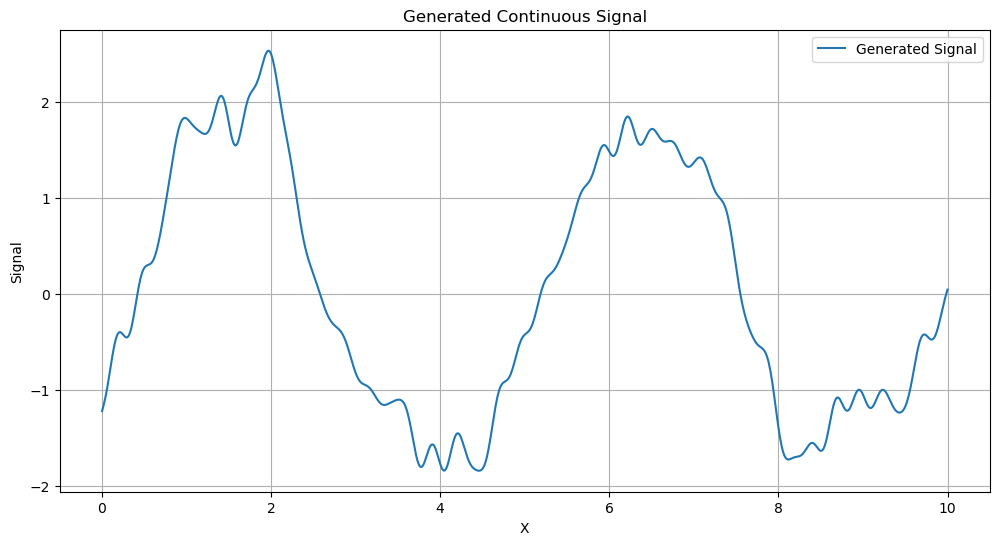

In [6]:
# Generate data points
n_samples = 1000
N_components = 50  # Number of signal components - you can change this


X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y = generate_continuous_signal(X.flatten(), N=N_components)


plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Generated Signal')
plt.title('Generated Continuous Signal')
plt.xlabel('X')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/20000], Loss: 2.6842
Epoch [200/20000], Loss: 0.4230
Epoch [300/20000], Loss: 0.1237
Epoch [400/20000], Loss: 0.0884
Epoch [500/20000], Loss: 0.0808
Epoch [600/20000], Loss: 0.0782
Epoch [700/20000], Loss: 0.0770
Epoch [800/20000], Loss: 0.0763
Epoch [900/20000], Loss: 0.0759
Epoch [1000/20000], Loss: 0.0756
Epoch [1100/20000], Loss: 0.0754
Epoch [1200/20000], Loss: 0.0752
Epoch [1300/20000], Loss: 0.0750
Epoch [1400/20000], Loss: 0.0749
Epoch [1500/20000], Loss: 0.0748
Epoch [1600/20000], Loss: 0.0747
Epoch [1700/20000], Loss: 0.0746
Epoch [1800/20000], Loss: 0.0746
Epoch [1900/20000], Loss: 0.0745
Epoch [2000/20000], Loss: 0.0745
Epoch [2100/20000], Loss: 0.0745
Epoch [2200/20000], Loss: 0.0744
Epoch [2300/20000], Loss: 0.0744
Epoch [2400/20000], Loss: 0.0744
Epoch [2500/20000], Loss: 0.0745
Epoch [2600/20000], Loss: 0.0744
Epoch [2700/20000], Loss: 0.0743
Epoch [2800/20000], Loss: 0.0743
Epoch [2900/20000], Loss: 0.0743
Epoch [3000/20000], Loss: 0.0743
Epoch [3100/20000],

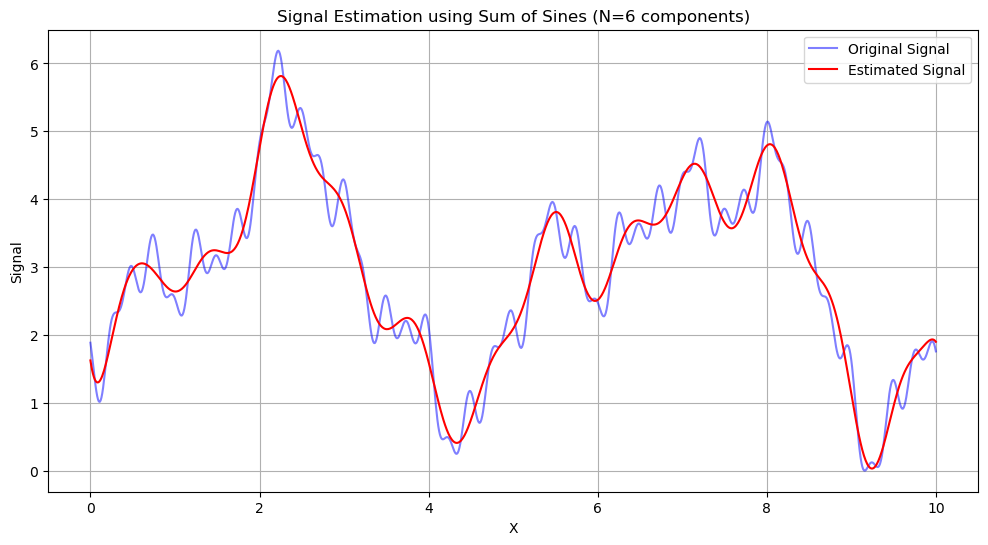

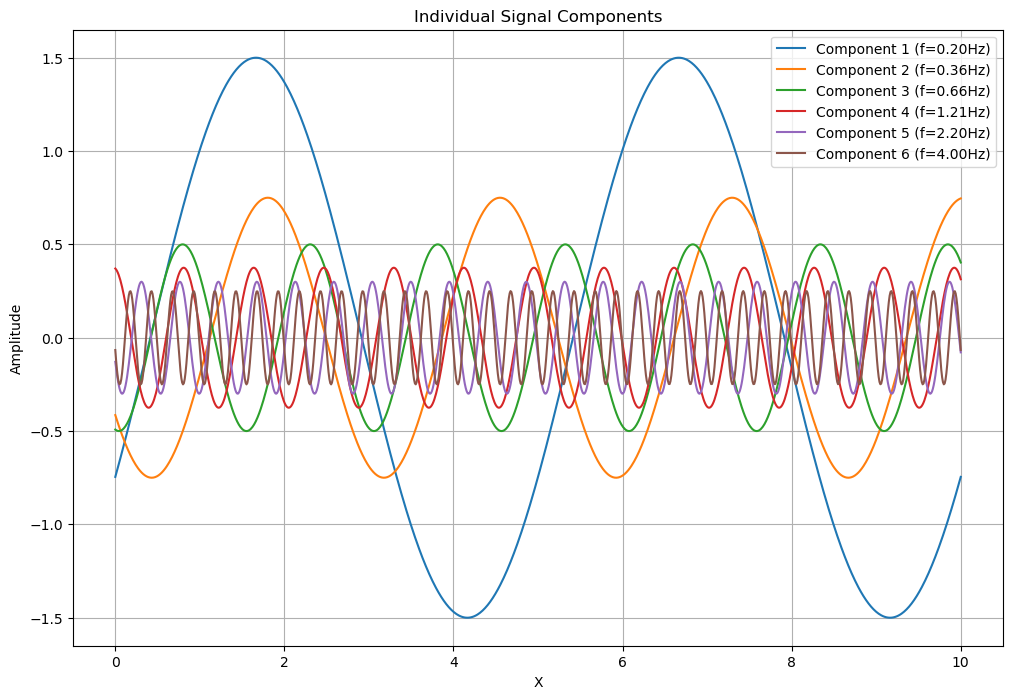


Learned Parameters:
Frequencies: [0.93879116 4.4409676  8.361497   6.544607   3.3962355  4.9468775
 2.5190203  7.460629   1.1801139  0.18995881 7.990764   3.9026024
 1.2299906  8.557735   0.7665126  5.4833183  7.047245   7.0548186
 2.1884491  6.020945  ]
Amplitudes: [-0.9198176   1.7927102   1.6678535   2.0261385   0.64567417  1.8109012
  0.6771745   1.8812507   0.115431    3.5036676   1.7094957   0.9005188
  1.0795007   0.7968837   0.6243698  -1.8199339   0.5889557   1.930187
  1.1105245   1.8987875 ]
Phases: [ 4.932361    2.7473185   1.8956846   4.705767    7.79178     3.3040683
  2.4977546  -0.07242243  5.103735    7.212064    6.9147105   8.306183
  4.743772    4.031402    1.0995669   6.89264    -0.12747358  5.0262218
  1.7726609   4.1949844 ]


In [ ]:

y = y - np.min(y)  # Normalize the signal

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X.flatten())
y_tensor = torch.FloatTensor(y.flatten())

# Initialize model and optimizer
model = SineModel(num_sines=20)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Training loop
n_epochs = 20000
for epoch in range(n_epochs):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b-', label='Original Signal', alpha=0.5)
plt.plot(X, model(X_tensor).detach().numpy(), 'r-', label='Estimated Signal')
plt.legend()
plt.title(f'Signal Estimation using Sum of Sines (N={N_components} components)')
plt.xlabel('X')
plt.ylabel('Signal')
plt.grid(True)
plt.show()

# Plot individual components
plt.figure(figsize=(12, 8))
x_plot = X.flatten()
frequencies = np.exp(np.linspace(np.log(0.2), np.log(4.0), N_components))
amplitudes = 1.5 / (1 + np.arange(N_components))
phases = np.random.rand(N_components) * 2 * np.pi

for i in range(N_components):
    if i % 2 == 0:
        component = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * x_plot + phases[i])
    else:
        component = amplitudes[i] * np.cos(2 * np.pi * frequencies[i] * x_plot + phases[i])
    plt.plot(x_plot, component, label=f'Component {i+1} (f={frequencies[i]:.2f}Hz)')

plt.legend()
plt.title('Individual Signal Components')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Print learned parameters
print("\nLearned Parameters:")
print("Frequencies:", model.frequencies.detach().numpy())
print("Amplitudes:", model.amplitudes.detach().numpy())
print("Phases:", model.phases.detach().numpy())